In [1]:
import pandas as pd
import numpy as np
import warnings
from scipy import stats
from pandas.api.types import is_numeric_dtype
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,auc
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df0 = pd.read_csv("Train.csv")

In [4]:
df1 = pd.read_csv("Test.csv")

In [5]:
df1.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,NaN,1.0,A,S,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,NaN,1.0,A,S,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO


In [6]:
#test.csv only has first 24 columns. We will use train.csv to predict test.csv
df1.shape

(929615, 24)

In [7]:
pd.isnull(df1).sum()

fecha_dato                    0
ncodpers                      0
ind_empleado                  0
pais_residencia               0
sexo                          5
age                           0
fecha_alta                    0
ind_nuevo                     0
antiguedad                    0
indrel                        0
ult_fec_cli_1t           927932
indrel_1mes                  23
tiprel_1mes                  23
indresi                       0
indext                        0
conyuemp                 929511
canal_entrada              2081
indfall                       0
tipodom                       0
cod_prov                   3996
nomprov                    3996
ind_actividad_cliente         0
renta                         0
segmento                   2248
dtype: int64

In [8]:
#Some columns contain NA values
pd.isnull(df0).sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

In [9]:
df0.shape

(13647309, 48)

In [10]:
#Drop column "ult_fec_cli_1t" and "conyuemp" because all values are NAN
del df0['ult_fec_cli_1t']
del df0['conyuemp']

del df1['ult_fec_cli_1t']
del df1['conyuemp']

In [11]:
df0.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,1.0,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,A,S,N,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [12]:
#Remove all rows which has NA value. Now there is no NA value in data

df = df0.dropna()
df_test = df1.dropna()
df.isna().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
canal_entrada            False
indfall                  False
tipodom                  False
cod_prov                 False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme

In [13]:
print(df.shape[0])
print(df_test.shape[0])

10795392
923309


In [14]:
print(df.dtypes)
print("------------")
print(df_test.dtypes)

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_fin_ult1          int64
ind_ctop_fin_ult1          int64
ind_ctpp_f

In [15]:
#Change data types of "age" and "antiguedad" to numeric
df["age"] = pd.to_numeric(df["age"])
df["antiguedad"] = pd.to_numeric(df["antiguedad"])
df_test["age"] = pd.to_numeric(df_test["age"])
df_test["antiguedad"] = pd.to_numeric(df_test["antiguedad"])
df_test["renta"] = pd.to_numeric(df_test["renta"], errors='coerce')
df_test = df_test[['sexo', 'ind_nuevo', 'ind_actividad_cliente', 'renta']]
df_test = df_test.dropna()

In [16]:
#list all columns
col_list = df.columns.values.tolist()
col_list

['fecha_dato',
 'ncodpers',
 'ind_empleado',
 'pais_residencia',
 'sexo',
 'age',
 'fecha_alta',
 'ind_nuevo',
 'antiguedad',
 'indrel',
 'indrel_1mes',
 'tiprel_1mes',
 'indresi',
 'indext',
 'canal_entrada',
 'indfall',
 'tipodom',
 'cod_prov',
 'nomprov',
 'ind_actividad_cliente',
 'renta',
 'segmento',
 'ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1']

#For all columns with numeric datatype, remove outliers
for i in col_list:
    if is_numeric_dtype(df[i]):
        if i == "ind_ahor_fin_ult1":
            break
        print(i, "is_numeric_dtype")
        if df[i].std() != 0:
            df = df[(np.abs(stats.zscore(df[i])) < 3)]
        print("num columns in df: ", df.shape[0])

In [17]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,1.0,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHE,N,1.0,45.0,TOLEDO,0.0,22220.04,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [18]:
df['sum']=0

In [19]:
#Sum is the total number of bank product the customer use.
df['sum']=df.iloc[:,24:-2].sum(axis=1)

In [20]:
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,sum
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,1.0,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHE,N,1.0,45.0,TOLEDO,0.0,22220.04,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647302,2016-05-28,1166767,N,ES,V,25,2013-08-14,0.0,33,1.0,1.0,I,S,S,KHE,N,1.0,50.0,ZARAGOZA,0.0,73134.81,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
13647303,2016-05-28,1166766,N,ES,V,25,2013-08-14,0.0,33,1.0,1,I,S,N,KHE,N,1.0,50.0,ZARAGOZA,0.0,50945.25,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,1,I,S,N,KHE,N,1.0,50.0,ZARAGOZA,0.0,43912.17,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,1,I,S,N,KHE,N,1.0,26.0,"RIOJA, LA",0.0,23334.99,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0


<AxesSubplot:xlabel='age', ylabel='renta'>

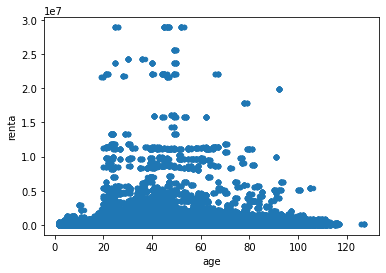

In [21]:
df.plot.scatter(x='age', y='renta', colormap='viridis')

In [22]:
df.loc[df['sum'] > 1.0]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,sum
41,2015-01-28,1050676,N,ES,V,31,2012-08-10,0.0,35,1.0,1.0,A,S,N,KFC,N,1.0,45.0,TOLEDO,0.0,90431.85,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2.0
44,2015-01-28,1050686,N,ES,V,39,2012-08-10,0.0,35,1.0,1.0,A,S,N,KFC,N,1.0,10.0,CACERES,1.0,37075.26,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,1,2.0
45,2015-01-28,1050688,N,ES,V,63,2012-08-10,0.0,35,1.0,1.0,A,S,N,KFC,N,1.0,28.0,MADRID,1.0,245052.27,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2.0
47,2015-01-28,1050694,N,ES,V,31,2012-08-10,0.0,35,1.0,1.0,A,S,N,KFC,N,1.0,28.0,MADRID,1.0,57155.34,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,1,2.0
56,2015-01-28,1050662,N,ES,V,37,2012-08-10,0.0,35,1.0,1.0,A,S,N,KAT,N,1.0,28.0,MADRID,1.0,122456.91,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647079,2016-05-28,1167116,N,ES,V,31,2013-08-19,0.0,33,1.0,1.0,A,S,N,KFA,N,1.0,28.0,MADRID,1.0,91246.71,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0,2.0
13647104,2016-05-28,1166671,N,ES,H,34,2013-08-14,0.0,33,1.0,1,A,S,N,KHE,N,1.0,46.0,VALENCIA,1.0,148876.17,02 - PARTICULARES,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1,3.0
13647106,2016-05-28,1166668,N,ES,H,62,2013-08-14,0.0,33,1.0,1,A,S,N,KHE,N,1.0,8.0,BARCELONA,1.0,93653.79,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2.0
13647233,2016-05-28,1166836,N,ES,V,27,2013-08-16,0.0,33,1.0,1.0,A,S,N,KHE,N,1.0,30.0,MURCIA,1.0,83108.82,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0,2.0


In [23]:
#calculate mean value in train.csv
renta_mean = df["renta"].mean()
print(renta_mean)

134253.00239092176


In [24]:
#calculate mean value in test.csv
renta_mean_test = df_test["renta"].mean()
print(renta_mean_test)

133986.21110979852


In [25]:
#if income higher than mean value, mark it with 1 for high income. Otherwise mark it as 0.
#df.loc[df["renta"] <= renta_mean, "renta"] = 0
#df.loc[df["renta"] >= renta_mean, "renta"] = 1

#df_test.loc[df_test["renta"] <= renta_mean_test, "renta"] = 0
#df_test.loc[df_test["renta"] >= renta_mean_test, "renta"] = 1

In [26]:
#If the customer has more than 2 bank product, it will be seeing as a cross selling customer.
df.loc[df["sum"] <= 1, "sum"] = 0
df.loc[df["sum"] > 1, "sum"] = 1

In [27]:
df2 = df[['sexo', 'ind_nuevo', 'ind_actividad_cliente', 'renta', 'sum']]
df3 = df_test[['sexo', 'ind_nuevo', 'ind_actividad_cliente', 'renta']]

In [28]:
df2.head()

,sexo,ind_nuevo,ind_actividad_cliente,renta,sum
0,H,0.0,1.0,87218.10,0.0
1,V,0.0,0.0,35548.74,0.0
2,V,0.0,0.0,122179.11,0.0
3,H,0.0,0.0,119775.54,0.0
5,H,0.0,0.0,22220.04,0.0


In [29]:
df2 = pd.get_dummies(df2, columns=['sexo'], prefix='sexo')
df3 = pd.get_dummies(df3, columns=['sexo'], prefix='sexo')

In [30]:
#choose features to use in modeling
features= ['ind_nuevo', 'ind_actividad_cliente', 'renta', 'sexo_H']

In [31]:
df2

,ind_nuevo,ind_actividad_cliente,renta,sum,sexo_H,sexo_V
0,0.0,1.0,87218.10,0.0,1,0
1,0.0,0.0,35548.74,0.0,0,1
2,0.0,0.0,122179.11,0.0,0,1
3,0.0,0.0,119775.54,0.0,1,0
5,0.0,0.0,22220.04,0.0,1,0
...,...,...,...,...,...,...
13647302,0.0,0.0,73134.81,0.0,0,1
13647303,0.0,0.0,50945.25,0.0,0,1
13647304,0.0,0.0,43912.17,0.0,0,1
13647305,0.0,0.0,23334.99,0.0,0,1


In [32]:
df3

,ind_nuevo,ind_actividad_cliente,renta,sexo_H,sexo_V
0,0,1,326124.90,0,1
3,0,0,148402.98,1,0
4,0,0,106885.80,1,0
6,0,1,96395.88,1,0
9,0,1,68322.72,1,0
...,...,...,...,...,...
929608,0,0,70852.20,0,1
929609,0,0,100647.45,1,0
929610,0,1,128643.57,0,1
929612,0,1,72765.27,0,1


In [33]:
#split data to 80% train and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(df2[features],df2['sum'], test_size = 0.2)
X_train.shape,X_test.shape

((8636313, 4), (2159079, 4))

In [34]:
#calculate model performance
def performance_met(model,X_train,Y_train,X_test,Y_test):
    acc_train=accuracy_score(Y_train, model.predict(X_train))
    f1_train=f1_score(Y_train, model.predict(X_train))
    acc_test=accuracy_score(Y_test, model.predict(X_test))
    f1_test=f1_score(Y_test, model.predict(X_test))
    print("train score: accuracy:{} f1:{}".format(acc_train,f1_train))
    print("test score: accuracy:{} f1:{}".format(acc_test,f1_test))

In [35]:
#linear model
model_linear = LogisticRegression()
model_linear.fit(X_train,Y_train)
performance_met(model_linear,X_train,Y_train,X_test,Y_test)

train score: accuracy:0.7277077614023484 f1:0.0
test score: accuracy:0.727239253403882 f1:0.0


In [36]:
#ensemble model
model_ensemble= RandomForestClassifier(n_estimators = 20,max_depth=20,n_jobs=-1)
model_ensemble.fit(X_train,Y_train)
performance_met(model_ensemble,X_train,Y_train,X_test,Y_test)

train score: accuracy:0.8065376972789199 f1:0.6592528161897644
test score: accuracy:0.8054309267979541 f1:0.6577298991986077


In [37]:
#boosting model
model_boosting = AdaBoostClassifier()
model_boosting.fit(X_train,Y_train)
performance_met(model_boosting,X_train,Y_train,X_test,Y_test)

train score: accuracy:0.7807272617377347 f1:0.6282568367905806
test score: accuracy:0.7807176115371415 f1:0.6286158045841765


In [38]:
#use linear model to predict data from test.csv
df3["predict_linear"] = model_linear.predict(df3[features])

In [39]:
#use ensemble model to predict data from test.csv
df3["predict_ensemble"] = model_ensemble.predict(df3[features])

In [40]:
#use boosting model to predict data from test.csv
df3["predict_boosting"] = model_boosting.predict(df3[features])

In [41]:
df3

,ind_nuevo,ind_actividad_cliente,renta,sexo_H,sexo_V,predict_linear,predict_ensemble,predict_boosting
0,0,1,326124.90,0,1,0.0,1.0,1.0
3,0,0,148402.98,1,0,0.0,0.0,0.0
4,0,0,106885.80,1,0,0.0,0.0,0.0
6,0,1,96395.88,1,0,0.0,0.0,0.0
9,0,1,68322.72,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
929608,0,0,70852.20,0,1,0.0,0.0,0.0
929609,0,0,100647.45,1,0,0.0,0.0,0.0
929610,0,1,128643.57,0,1,0.0,1.0,1.0
929612,0,1,72765.27,0,1,0.0,1.0,1.0
